In [13]:
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

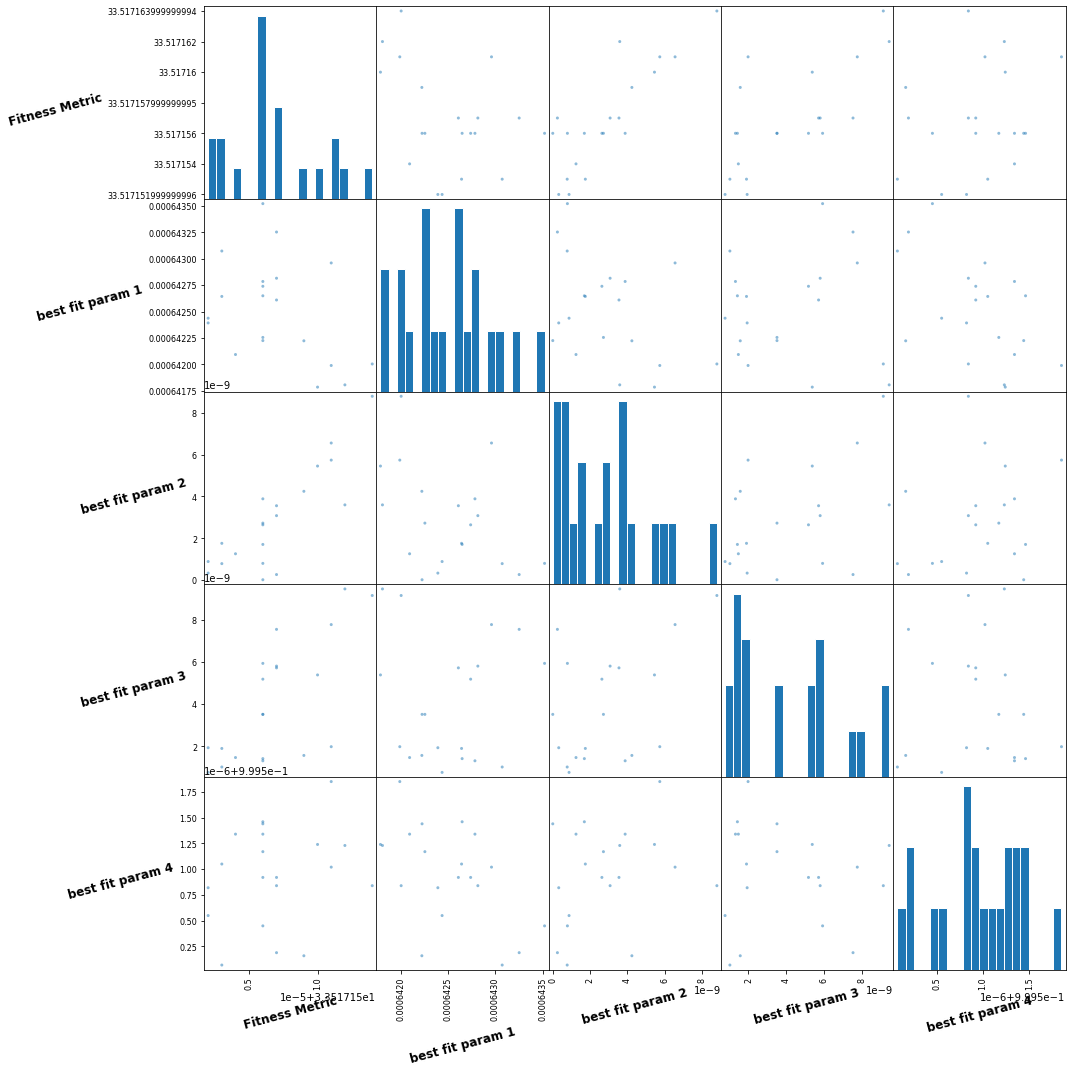

<Figure size 432x288 with 0 Axes>

In [14]:
def scatter_hist(cfit):
    # NEED TO FIX TEXT AND TICK VALUES

    """Plots pairwise scatter plots & histograms matrix using pandas.scatter_matrix"""
    
    df = pd.read_table(cfit, header=None)
    df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']
    # ^^ this wont be universal

    df = df.transpose()
    scatter_axes = pd.plotting.scatter_matrix(df, figsize=(15,15),  hist_kwds={'bins':20, 'edgecolor':'white', 'linewidth':1})


    for ax in scatter_axes.flatten():
        ax.yaxis.label.set_ha('right')
        ax.set_xlabel(ax.get_xlabel(), fontsize = 12, weight = 'bold', rotation = 15)
        ax.set_ylabel(ax.get_ylabel(), fontsize = 12, weight = 'bold', rotation = 15)
        plt.ticklabel_format(scilimits = (-3,0))


    plt.tight_layout()
    plt.gcf().subplots_adjust(wspace=0, hspace=0)
    plt.show()

    plt.tight_layout()
    
    # https://www.marsja.se/pandas-scatter-matrix-pair-plot/ 
    # https://github.com/marsja/jupyter/blob/master/scatter_matrix.ipynb
    # https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
    # scatter_matrix returns a np array of AXES, PLT cant work on all those axes at once -- you need to iterate through them and then do adjustments!!
    # https://stackoverflow.com/questions/43217174/how-can-the-sizes-and-rotations-of-text-of-a-pandas-scatter-matrix-be-set
    # scatter_matrix and scilims, showing big  xticks values https://stackoverflow.com/questions/54712340/scatter-matrix-showing-too-many-floating-point-values-on-graph

    
    
scatter_hist('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit')

In [16]:
def trim_axs(axs, N):
        """
        Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
        """
        axs = axs.flat
        for ax in axs[N:]:
            ax.remove()

        return axs[:N]

In [19]:
def plot_hist(cfit):
    
    df = pd.read_table(cfit, header=None) 
    df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']    
    
    axs = plt.figure(figsize=(8*3,7*2)).subplots(2, 3, sharey=True)
    axs = trim_axs(axs,len(df.index))
    
    colors = ['deepskyblue','pink','coral','mediumslateblue','cornflowerblue','seagreen']
    
    for i in range(len(df.index)):
        axs.flat[i].hist(df.iloc[i],edgecolor='white', linewidth=1, color=colors[i])
        axs.flat[i].set_title(df.index[i],weight='bold', size=14)
        axs[i].tick_params(axis='x', labelrotation=30)
        plt.xticks(ha='right')
        axs.flat[i].ticklabel_format(scilimits=(-3,0))
        
#     https://www.pythoncharts.com/2019/05/17/rotating-axis-labels/

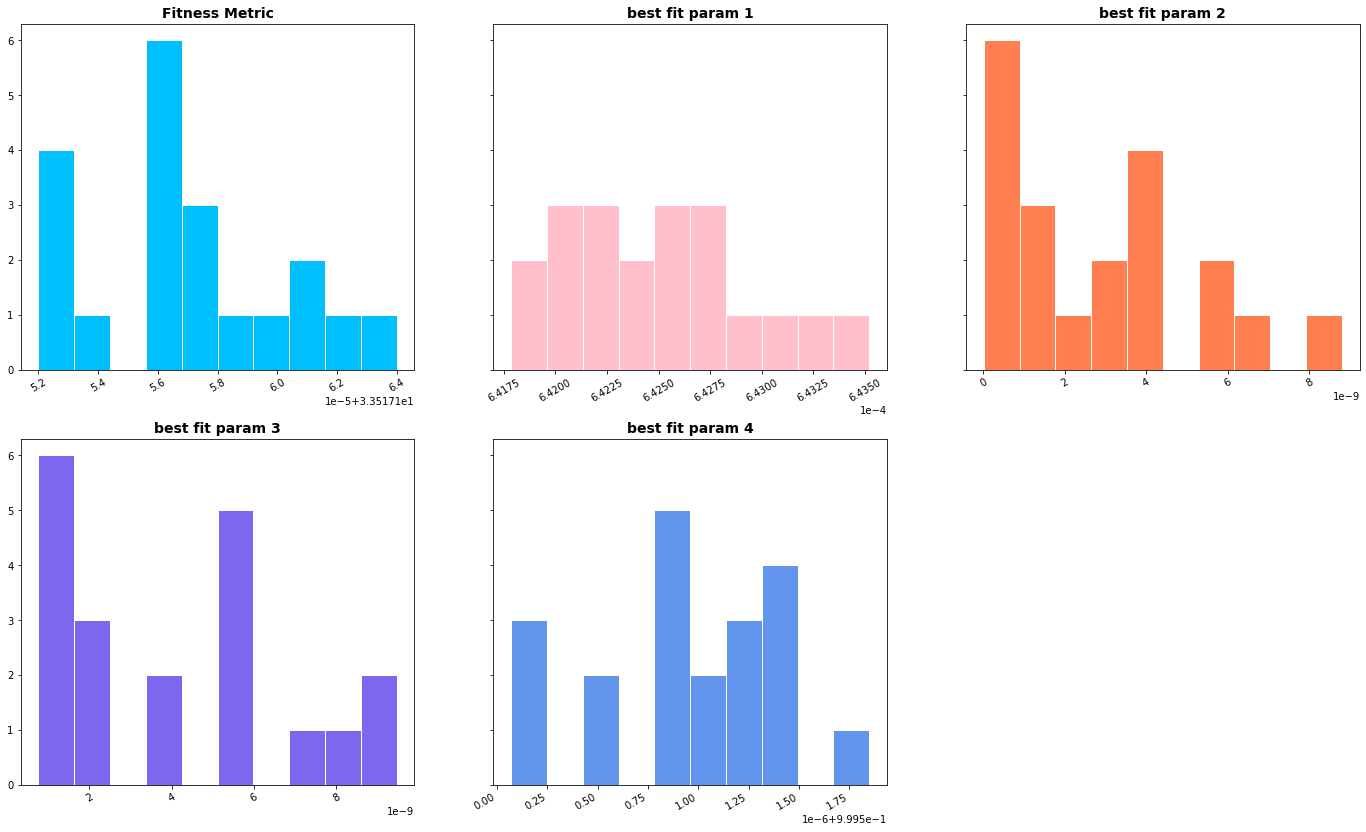

In [20]:
plot_hist('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit')
# works on command line

In [7]:
# # working on it..
# def scatter_hist(x, y, ax, ax_histx, ax_histy):
   
#     """
#     Creates pairwise scatterplot of each parameter with histograms of each param

#     https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_hist.html
    
#     """

#     # remove x&y labels labels
#     ax_histx.tick_params(axis="x", labelbottom=False)
#     ax_histy.tick_params(axis="y", labelleft=False)
    
#     colors = ['deepskyblue','pink','coral','mediumslateblue','cornflowerblue','seagreen']
#     c1 = random.choice(colors)
# #     colors.remove(c1)
# #     c2 = random.choice(colors)
    
#     ax.scatter(x,y, color = c1)
    
#     ax_histx.hist(x, edgecolor='white', linewidth=1, color=c1)
#     ax_histy.hist(y, orientation='horizontal', edgecolor='white', color = c1)


    
# def hist_plt(df, indx, indy):
    
#     """
#     Plots scatterplot and customizes histograms of both parameters df.iloc[indx], df.iloc[indy]
    
#     df = dataframe
#     indx = index of first param  df.iloc[indx]
#     indy = index of second param  df.iloc[indy]
    
#     https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py
    
#     """
    
#     fig = plt.figure(figsize=(8, 8))
     
        
#     # using a gridspec to customize fig layouts
#     gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
#                           left=0.1, right=0.9, bottom=0.1, top=0.9,
#                           wspace=0.05, hspace=0.05)

# #     gs = fig.add_gridspec(4, 4, left=0.1, right=0.9, bottom=0.1, top=0.9,  wspace=0.05, hspace=0.05)

# #     for i in range(len(df.index)):
        
        
        
#     ax = fig.add_subplot(gs[1,0])

#     ax_histx = fig.add_subplot(gs[0,0], sharex=ax)
#     ax_histx.set_title(df.index[indx],weight='bold')

#     ax_histy = fig.add_subplot(gs[1,1], sharey=ax)
#     ax_histy.set_title(df.index[indy], weight='bold')
    
#     scatter_hist(df.iloc[indx], df.iloc[indy], ax, ax_histx, ax_histy)

#     plt.show()

    
    
# # hist_plt(df, 0, 1)
# # hist_plt(df, 0, 2)
# # hist_plt(df, 0, 3)
# # hist_plt(df, 0, 4)
# # hist_plt(df, 1, 2)
# # hist_plt(df, 1, 3)
# # hist_plt(df, 1, 4)
# # hist_plt(df, 2, 3)
# # hist_plt(df, 2, 4)
# # hist_plt(df, 3, 4)


# for i in range(len(df.index)-1):
#     for j in range(1, len(df.index)):
#         hist_plt(df, i, j)


# # now edit the funcs so it takes in cfit file as input !! 

# # how to fix the e-5+33.5 text below the hist

In [8]:
# # Pairwise scatterplots -- working on it......

# def plot_scatter(cfit):
    
#     df = pd.read_table(cfit, header=None) 
#     df.index = ['Fitness Metric', 'best fit param 1', 'best fit param 2', 'best fit param 3', 'best fit param 4']    
        
        
#     for j in range(1, len(df.index)):
        
#         axs = plt.figure(figsize=(8*3,7*2)).subplots(2,3, sharey=True)
#         axs = trim_axs(axs,len(df.index))  
           
#         for i in range(len(df.index)):
            
# #             if i != j:  # how to remove scatterplot for i vs i ?
                
#             axs.flat[i].scatter(df.iloc[i],df.iloc[j], edgecolor='white', linewidth=1)

#             axs.flat[i].set_title(df.index[i] + " vs " + df.index[j],weight='bold', size=14)
#             axs[i].tick_params(axis='x', labelrotation=30)

                
#             plt.xticks(ha='right')

#             axs.flat[i].ticklabel_format(scilimits=(-3,0))
        

        

# plot_scatter('tau_2gyr_newdfk_sn_020_ps_000_r000_model_fits.cfit')

